## Predicting presence of Heart Diseases using Machine Learning

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. This dataset was obtained from Kaggle.

Attribute Information: <br>
> 1. age 
> 2. sex 
> 3. chest pain type (4 values) 
> 4. resting blood pressure 
> 5. serum cholestoral in mg/dl 
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved 
> 9. exercise induced angina 
> 10. oldpeak = ST depression induced by exercise relative to rest 
> 11. the slope of the peak exercise ST segment 
> 12. number of major vessels (0-3) colored by flourosopy 
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

Acknowledgements
Creators: 
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. 
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. 
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. 
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Donor: David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

Inspiration
Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

See if you can find any other trends in heart data to predict certain cardiovascular events or find any clear indications of heart health.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow

In [2]:
%matplotlib inline
#which means that the outputted plot will appear immediately under each code cell.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [22]:
from sklearn.naive_bayes import GaussianNB

In [31]:
from sklearn.linear_model import LogisticRegression

In [29]:
from sklearn import metrics

In [5]:
dataset = pd.read_csv('heart.csv')

In [6]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The presence of heart disease is indicated by 1 in the 'target' column of the dataset. In case of absence, it is 0. We have got a total of 13 features and 1 target variable.

Let's see if there are any Null values in the dataset.

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [8]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are a total of 303 recorded instances in the dataset. There are no Null values in the dataset. We also don't need to worry about the duplicate entries because the patient's social security numbers have been removed.

Let's see the descriptive statistics of the individual columns in the  dataset:

In [9]:
dataset.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


First look at the target variable, it has the mean around 0.5 which means that the dataset is balanced.
Looking across the row of min, max of all the columns, it is obvious that all the columns have different ranges. Thus, we need feature scaling here.

Let's first see if all the 13 features are necessary to be included in the predictive algorithms. Removing the features that are uncorrelated with the output target variable not only increases the speed of the algorithm but also increases the performance in terms of accuracy.

Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. Any NA values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.
###### method :  </br>
pearson : standard correlation coefficient <br>
kendall : Kendall Tau correlation coefficient <br>
spearman : Spearman rank correlation

We will use spearman correlation coefficient to check to what extent do two columns vary together linearly. 

In [10]:
dataset.corr(method ='pearson')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


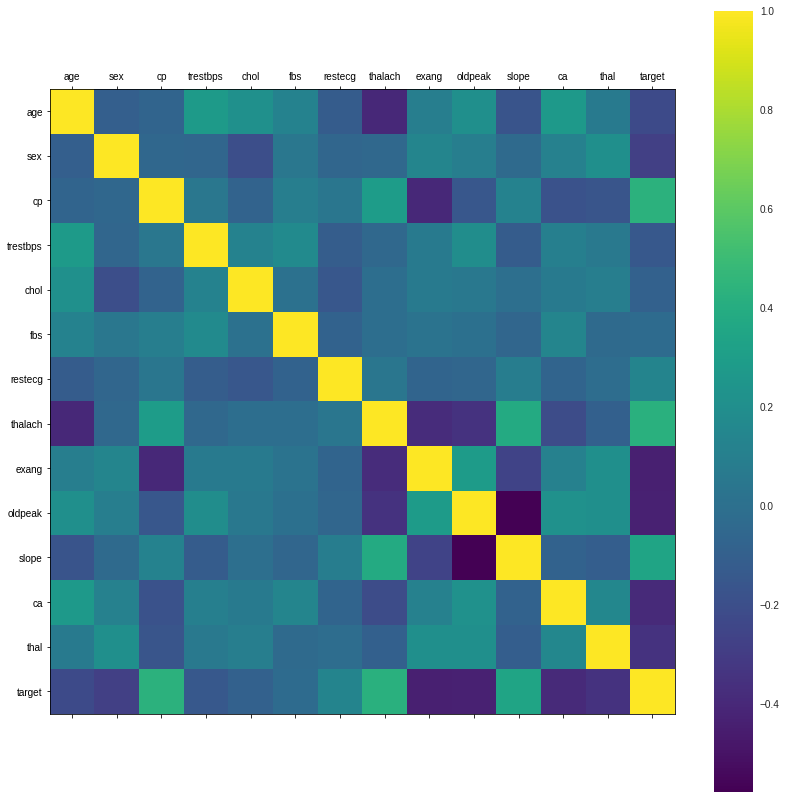

In [11]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(dataset.corr(method ='pearson'))
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.style.use('seaborn')
plt.colorbar()

We will use both the color scheme and numerical values to check the features that are highly correlated with the target variable.

It looks like {resting blood pressure, serum cholestoral, fasting blood sugar, resting electrocardiographic results} have very little to no correlation with the target variable.

In [12]:
dataset_useful = dataset.drop(['trestbps', 'chol', 'fbs', 'restecg'], axis=1)

Machine learning models like SVM are algebraic and need the categorical values to be converted into the numeric form. Since all of the columns that we have are in numeric, we do not need any such transformation.

However, we need to scale these features because of the reason that we highlighted above, they all have different ranges and different distributions.

In [13]:
standardScaler = StandardScaler()

In [14]:
cols_for_scaling = ['age', 'thalach', 'oldpeak']

In [15]:
dataset_useful[cols_for_scaling] = standardScaler.fit_transform(dataset_useful[cols_for_scaling])

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.5/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [16]:
dataset_useful.describe(include='all')

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
count,3.030000e+02,303.000000,303.000000,3.030000e+02,303.000000,3.030000e+02,303.000000,303.000000,303.000000,303.000000
mean,4.690051e-17,0.683168,0.966997,-6.800574e-16,0.326733,2.345026e-17,1.399340,0.729373,2.313531,0.544554
std,1.001654e+00,0.466011,1.032052,1.001654e+00,0.469794,1.001654e+00,0.616226,1.022606,0.612277,0.498835
min,-2.797624e+00,0.000000,0.000000,-3.439267e+00,0.000000,-8.968617e-01,0.000000,0.000000,0.000000,0.000000
25%,-7.572802e-01,0.000000,0.000000,-7.061105e-01,0.000000,-8.968617e-01,1.000000,0.000000,2.000000,0.000000
50%,6.988599e-02,1.000000,1.000000,1.466343e-01,0.000000,-2.067053e-01,1.000000,0.000000,2.000000,1.000000
75%,7.316189e-01,1.000000,2.000000,7.151309e-01,1.000000,4.834512e-01,2.000000,1.000000,3.000000,1.000000
max,2.496240e+00,1.000000,3.000000,2.289429e+00,1.000000,4.451851e+00,2.000000,4.000000,3.000000,1.000000


### Predictive Algorithms

In [17]:
Y = dataset_useful['target']
X = dataset_useful.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 0)

#### K-Nearest Neighbors

K-Nearest Neighbors is a non-parametric classification algorithms in Machine Learning. It belongs to the supervised learning domain and finds intense applications in pattern recognition, data mining.
it does not make any underlying assumptions about the distribution of data.

In [20]:
knn_scores = []
for k in range(1, 11):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'K Nearest Neighbors Classifier scores for different values of K')

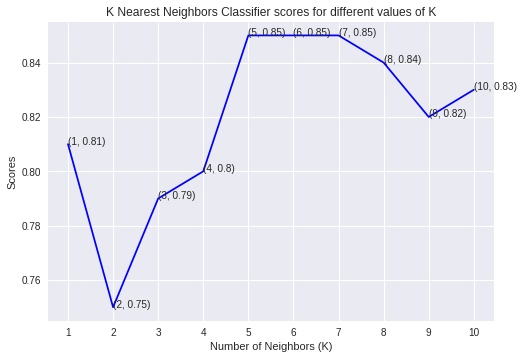

In [21]:
plt.plot([k for k in range(1, 11)], knn_scores, color = 'blue')

for i in range(1, 11):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 11)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Nearest Neighbors Classifier scores for different values of K')

We have the score of 0.85 at K=7 

#### Naive bayes Classifier

In [26]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [27]:
predicted= model.predict(X_test)

In [28]:
print(predicted)

[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0
 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0]


In [30]:
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Accuracy: 0.8


With Gaussian Naive Bayes' Classifier, the accuracy is 0.8. That means with the use of KNN, we have the advantage of 4% increase in accuracy of the results over Naive Bayes' Classifier. 

#### Logistic Regression

Logistic Regression is one of the most simple and commonly used Machine Learning algorithms for two-class classification. It is easy to implement and can be used as the baseline for any binary classification problem. Its basic fundamental concepts are also constructive in deep learning. Logistic regression describes and estimates the relationship between one dependent binary variable and independent variables.

In [33]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
predictions=logreg.predict(X_test)

In [35]:
print(predictions)

[0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0
 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0]


In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.81


We obtain just about the same level of accuracy with the logistic regression as the Naive Bayes algorithm.

Let's see if we can improve upon this by some technique.

Check if another scaling technique can be used.

In [40]:
scaler = MinMaxScaler(feature_range = (0,1))

In [45]:
cols_for_scaling = ['age', 'cp', 'thalach', 'oldpeak', 'slope', 'ca', 'thal']

In [47]:
dataset_useful[cols_for_scaling] = scaler.fit_transform(dataset_useful[cols_for_scaling])

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [48]:
dataset_useful.describe(include = 'all')

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.528465,0.683168,0.322332,0.600358,0.326733,0.167678,0.699670,0.182343,0.771177,0.544554
std,0.189210,0.466011,0.344017,0.174849,0.469794,0.187270,0.308113,0.255652,0.204092,0.498835
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385417,0.000000,0.000000,0.477099,0.000000,0.000000,0.500000,0.000000,0.666667,0.000000
50%,0.541667,1.000000,0.333333,0.625954,0.000000,0.129032,0.500000,0.000000,0.666667,1.000000
75%,0.666667,1.000000,0.666667,0.725191,1.000000,0.258065,1.000000,0.250000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now let's try again !

In [52]:
Y = dataset_useful['target']
X = dataset_useful.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 0)

In [53]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
predictions=logreg.predict(X_test)

In [55]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.8


Nope ! It does not work.

#### Conclusion

We have deployed three classification algorithms: Naive Bayes Classifier, KNN algorithm and Logistic Regression. KNN algorithm has the highest accuracy when we draw the comparison. We plan to extend this work: </br>
- By improving the performance of Logistic Regression using the Ridge Regression technique.
- Using the SVM for classification task.
- Deploying Neural Network for this task.